<h1 align="center">NBA player of the week </h1 > 
<h4 align="center"> (Analysis of Player of the week data from 1984-1985 to 1999-2000) </h4 >  


In [1]:
#Importing panda and numpy library
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xlsxwriter

### Reading the raw data from csv file :

In [2]:
#Displaying the whole data - extraction
nba_raw_data = pd.read_csv("NBA_player_of_the_week.csv")
nba_raw_data.head(15)


,Age,Conference,Date,Draft Year,Height,Player,Position,Season,Season short,Seasons in league,Team,Weight,Real_value
0,29,NaN,"Apr 14, 1985",1978,06-05,Micheal Ray Richardson,PG,1984-1985,1985,6,New Jersey Nets,189,1.0
1,23,NaN,"Apr 7, 1985",1982,06-06,Derek Smith,SG,1984-1985,1985,2,Los Angeles Clippers,205,1.0
2,28,NaN,"Apr 1, 1985",1979,06-06,Calvin Natt,F,1984-1985,1985,5,Denver Nuggets,220,1.0
3,37,NaN,"Mar 24, 1985",1969,07-02,Kareem Abdul-Jabbar,C,1984-1985,1985,15,Los Angeles Lakers,225,1.0
4,28,NaN,"Mar 17, 1985",1978,06-09,Larry Bird,SF,1984-1985,1985,5,Boston Celtics,220,1.0
5,26,NaN,"Mar 10, 1985",1980,06-04,Darrell Griffith,SG,1984-1985,1985,4,Utah Jazz,190,1.0
6,24,NaN,"Mar 3, 1985",1982,06-03,Sleepy Floyd,PG,1984-1985,1985,2,Golden State Warriors,170,1.0
7,25,NaN,"Feb 24, 1985",1981,06-06,Mark Aguirre,SF,1984-1985,1985,3,Dallas Mavericks,232,1.0
8,25,NaN,"Feb 17, 1985",1979,06-09,Magic Johnson,PG,1984-1985,1985,5,Los Angeles Lakers,255,1.0
9,25,NaN,"Feb 3, 1985",1982,06-07,Dominique Wilkins,SF,1984-1985,1985,2,Atlanta Hawks,200,1.0


### Choosing the data for years before 2001 :

In [3]:
#Displaying a subset of data and storing in nba_df

criteria = (nba_raw_data['Season short'] < 2001)
nba_df = nba_raw_data[criteria]
nba_df.head(10)



,Age,Conference,Date,Draft Year,Height,Player,Position,Season,Season short,Seasons in league,Team,Weight,Real_value
0,29,NaN,"Apr 14, 1985",1978,06-05,Micheal Ray Richardson,PG,1984-1985,1985,6,New Jersey Nets,189,1.0
1,23,NaN,"Apr 7, 1985",1982,06-06,Derek Smith,SG,1984-1985,1985,2,Los Angeles Clippers,205,1.0
2,28,NaN,"Apr 1, 1985",1979,06-06,Calvin Natt,F,1984-1985,1985,5,Denver Nuggets,220,1.0
3,37,NaN,"Mar 24, 1985",1969,07-02,Kareem Abdul-Jabbar,C,1984-1985,1985,15,Los Angeles Lakers,225,1.0
4,28,NaN,"Mar 17, 1985",1978,06-09,Larry Bird,SF,1984-1985,1985,5,Boston Celtics,220,1.0
5,26,NaN,"Mar 10, 1985",1980,06-04,Darrell Griffith,SG,1984-1985,1985,4,Utah Jazz,190,1.0
6,24,NaN,"Mar 3, 1985",1982,06-03,Sleepy Floyd,PG,1984-1985,1985,2,Golden State Warriors,170,1.0
7,25,NaN,"Feb 24, 1985",1981,06-06,Mark Aguirre,SF,1984-1985,1985,3,Dallas Mavericks,232,1.0
8,25,NaN,"Feb 17, 1985",1979,06-09,Magic Johnson,PG,1984-1985,1985,5,Los Angeles Lakers,255,1.0
9,25,NaN,"Feb 3, 1985",1982,06-07,Dominique Wilkins,SF,1984-1985,1985,2,Atlanta Hawks,200,1.0


### Analysis of chosen data :
#### 1. Handling the missing data :-

In [4]:
#Checking for missing value
nba_df.isnull().sum()

Age                    0
Conference           360
Date                   0
Draft Year             0
Height                 0
Player                 0
Position               0
Season                 0
Season short           0
Seasons in league      0
Team                   0
Weight                 0
Real_value             2
dtype: int64

In [5]:
#Displayind rows with missing data
nba_df[nba_df.isnull().any(axis=1)].head(5)

,Age,Conference,Date,Draft Year,Height,Player,Position,Season,Season short,Seasons in league,Team,Weight,Real_value
0,29,NaN,"Apr 14, 1985",1978,06-05,Micheal Ray Richardson,PG,1984-1985,1985,6,New Jersey Nets,189,1.0
1,23,NaN,"Apr 7, 1985",1982,06-06,Derek Smith,SG,1984-1985,1985,2,Los Angeles Clippers,205,1.0
2,28,NaN,"Apr 1, 1985",1979,06-06,Calvin Natt,F,1984-1985,1985,5,Denver Nuggets,220,1.0
3,37,NaN,"Mar 24, 1985",1969,07-02,Kareem Abdul-Jabbar,C,1984-1985,1985,15,Los Angeles Lakers,225,1.0
4,28,NaN,"Mar 17, 1985",1978,06-09,Larry Bird,SF,1984-1985,1985,5,Boston Celtics,220,1.0


In [6]:
#Removing the column (Conference) with all missing values
nba_df = nba_df.drop(columns="Conference")

In [7]:
#Displayind rows with missing data
nba_df[nba_df.isnull().any(axis=1)]

,Age,Date,Draft Year,Height,Player,Position,Season,Season short,Seasons in league,Team,Weight,Real_value
18,29,"Dec 2, 1984",1977,06-11,Jack Sikma,C,1984-1985,1985,7,Seattle SuperSonics,230,NaN
42,32,"Nov 24, 1985",1976,06-07,Alex English,SF,1985-1986,1986,9,Denver Nuggets,190,NaN


In [8]:

#Fill fowrward method to replace the remaining missing data as they are carry forward values in Season short and real value
nba_df = nba_df.fillna(method = "ffill")
#Checking for row 18
nba_df.iloc[16:20]


,Age,Date,Draft Year,Height,Player,Position,Season,Season short,Seasons in league,Team,Weight,Real_value
16,23,"Dec 16, 1984",1982,06-06,Derek Smith,SG,1984-1985,1985,2,Los Angeles Clippers,205,1.0
17,25,"Dec 9, 1984",1981,06-09,Orlando Woolridge,PF,1984-1985,1985,3,Chicago Bulls,215,1.0
18,29,"Dec 2, 1984",1977,06-11,Jack Sikma,C,1984-1985,1985,7,Seattle SuperSonics,230,1.0
19,28,"Nov 25, 1984",1977,06-07,Bernard King,SF,1984-1985,1985,7,New York Knicks,205,1.0


In [9]:
#Checking for row index 42
nba_df.iloc[40:45]

,Age,Date,Draft Year,Height,Player,Position,Season,Season short,Seasons in league,Team,Weight,Real_value
40,27,"Dec 8, 1985",1980,06-10,Jeff Ruland,C,1985-1986,1986,4,Washington Bullets,240,1.0
41,29,"Dec 1, 1985",1978,06-09,Larry Bird,SF,1985-1986,1986,6,Boston Celtics,220,1.0
42,32,"Nov 24, 1985",1976,06-07,Alex English,SF,1985-1986,1986,9,Denver Nuggets,190,1.0
43,23,"Nov 17, 1985",1985,07-00,Patrick Ewing,C,1985-1986,1986,0,New York Knicks,240,1.0
44,25,"Nov 10, 1985",1981,06-08,Buck Williams,PF,1985-1986,1986,4,New Jersey Nets,215,1.0


In [10]:
#Re-Checking for missing value
nba_df.isnull().sum()

Age                  0
Date                 0
Draft Year           0
Height               0
Player               0
Position             0
Season               0
Season short         0
Seasons in league    0
Team                 0
Weight               0
Real_value           0
dtype: int64

#### 2. Normalization (1NF)

In [11]:
#Checking for the data types if there are any missmatch
nba_df.dtypes

Age                    int64
Date                  object
Draft Year             int64
Height                object
Player                object
Position              object
Season                object
Season short           int64
Seasons in league      int64
Team                  object
Weight                object
Real_value           float64
dtype: object

In [12]:
#Converting height from ft to cms
new_ht = []
for ft in nba_df['Height']:
    h_ft = int(ft[0:2])
    h_inch = int(ft[3:5])
    #print(h_ft+" "+h_inch)
    h_inch += h_ft * 12
    h_cm = round(float(h_inch) * 2.54, 2)
    new_ht.append(h_cm)
nba_df['Height'] = pd.Series(new_ht, index=nba_df.index)    
nba_df.head(15)

,Age,Date,Draft Year,Height,Player,Position,Season,Season short,Seasons in league,Team,Weight,Real_value
0,29,"Apr 14, 1985",1978,195.58,Micheal Ray Richardson,PG,1984-1985,1985,6,New Jersey Nets,189,1.0
1,23,"Apr 7, 1985",1982,198.12,Derek Smith,SG,1984-1985,1985,2,Los Angeles Clippers,205,1.0
2,28,"Apr 1, 1985",1979,198.12,Calvin Natt,F,1984-1985,1985,5,Denver Nuggets,220,1.0
3,37,"Mar 24, 1985",1969,218.44,Kareem Abdul-Jabbar,C,1984-1985,1985,15,Los Angeles Lakers,225,1.0
4,28,"Mar 17, 1985",1978,205.74,Larry Bird,SF,1984-1985,1985,5,Boston Celtics,220,1.0
5,26,"Mar 10, 1985",1980,193.04,Darrell Griffith,SG,1984-1985,1985,4,Utah Jazz,190,1.0
6,24,"Mar 3, 1985",1982,190.50,Sleepy Floyd,PG,1984-1985,1985,2,Golden State Warriors,170,1.0
7,25,"Feb 24, 1985",1981,198.12,Mark Aguirre,SF,1984-1985,1985,3,Dallas Mavericks,232,1.0
8,25,"Feb 17, 1985",1979,205.74,Magic Johnson,PG,1984-1985,1985,5,Los Angeles Lakers,255,1.0
9,25,"Feb 3, 1985",1982,200.66,Dominique Wilkins,SF,1984-1985,1985,2,Atlanta Hawks,200,1.0


In [13]:
#converting the data types to proper formats for season_short to int64, weight to int64 
nba_df = nba_df.astype({"Season short": np.int64,"Weight": np.float64,"Height": np.float64})
nba_df.dtypes

Age                    int64
Date                  object
Draft Year             int64
Height               float64
Player                object
Position              object
Season                object
Season short           int64
Seasons in league      int64
Team                  object
Weight               float64
Real_value           float64
dtype: object

In [14]:
#Renaming the column names to standard format
nba_df = nba_df.rename(columns={'Season short':'Season_end','Seasons in league':'Seasons_in_league','Draft Year':'Draft_year'})
nba_df.head(15)


,Age,Date,Draft_year,Height,Player,Position,Season,Season_end,Seasons_in_league,Team,Weight,Real_value
0,29,"Apr 14, 1985",1978,195.58,Micheal Ray Richardson,PG,1984-1985,1985,6,New Jersey Nets,189.0,1.0
1,23,"Apr 7, 1985",1982,198.12,Derek Smith,SG,1984-1985,1985,2,Los Angeles Clippers,205.0,1.0
2,28,"Apr 1, 1985",1979,198.12,Calvin Natt,F,1984-1985,1985,5,Denver Nuggets,220.0,1.0
3,37,"Mar 24, 1985",1969,218.44,Kareem Abdul-Jabbar,C,1984-1985,1985,15,Los Angeles Lakers,225.0,1.0
4,28,"Mar 17, 1985",1978,205.74,Larry Bird,SF,1984-1985,1985,5,Boston Celtics,220.0,1.0
5,26,"Mar 10, 1985",1980,193.04,Darrell Griffith,SG,1984-1985,1985,4,Utah Jazz,190.0,1.0
6,24,"Mar 3, 1985",1982,190.50,Sleepy Floyd,PG,1984-1985,1985,2,Golden State Warriors,170.0,1.0
7,25,"Feb 24, 1985",1981,198.12,Mark Aguirre,SF,1984-1985,1985,3,Dallas Mavericks,232.0,1.0
8,25,"Feb 17, 1985",1979,205.74,Magic Johnson,PG,1984-1985,1985,5,Los Angeles Lakers,255.0,1.0
9,25,"Feb 3, 1985",1982,200.66,Dominique Wilkins,SF,1984-1985,1985,2,Atlanta Hawks,200.0,1.0


In [15]:

#removing duplicate column. Since season_end and season_short are one and the same, 
#removing the second year range from season column
nba_df['Season_start'] = nba_df['Season'].str.extract('(^[0-9]{4})', expand=True).astype(int)
#Removing the column (Season) with all inappropriate values
nba_df = nba_df.drop(columns="Season")
nba_df.head(15)


,Age,Date,Draft_year,Height,Player,Position,Season_end,Seasons_in_league,Team,Weight,Real_value,Season_start
0,29,"Apr 14, 1985",1978,195.58,Micheal Ray Richardson,PG,1985,6,New Jersey Nets,189.0,1.0,1984
1,23,"Apr 7, 1985",1982,198.12,Derek Smith,SG,1985,2,Los Angeles Clippers,205.0,1.0,1984
2,28,"Apr 1, 1985",1979,198.12,Calvin Natt,F,1985,5,Denver Nuggets,220.0,1.0,1984
3,37,"Mar 24, 1985",1969,218.44,Kareem Abdul-Jabbar,C,1985,15,Los Angeles Lakers,225.0,1.0,1984
4,28,"Mar 17, 1985",1978,205.74,Larry Bird,SF,1985,5,Boston Celtics,220.0,1.0,1984
5,26,"Mar 10, 1985",1980,193.04,Darrell Griffith,SG,1985,4,Utah Jazz,190.0,1.0,1984
6,24,"Mar 3, 1985",1982,190.50,Sleepy Floyd,PG,1985,2,Golden State Warriors,170.0,1.0,1984
7,25,"Feb 24, 1985",1981,198.12,Mark Aguirre,SF,1985,3,Dallas Mavericks,232.0,1.0,1984
8,25,"Feb 17, 1985",1979,205.74,Magic Johnson,PG,1985,5,Los Angeles Lakers,255.0,1.0,1984
9,25,"Feb 3, 1985",1982,200.66,Dominique Wilkins,SF,1985,2,Atlanta Hawks,200.0,1.0,1984


In [16]:

#Changing the date format from mmm-dd-yyyy to yyyy-mm-dd and sorting based on dates
nba_df['Date'] = pd.to_datetime(nba_df['Date'])
nba_df = nba_df.sort_values(by='Date')
nba_df.head(15)

,Age,Date,Draft_year,Height,Player,Position,Season_end,Seasons_in_league,Team,Weight,Real_value,Season_start
22,26,1984-11-04,1981,208.28,Larry Nance,PF,1985,3,Phoenix Suns,205.0,1.0,1984
21,31,1984-11-11,1976,200.66,Alex English,SF,1985,8,Denver Nuggets,190.0,1.0,1984
20,29,1984-11-18,1976,208.28,Moses Malone,C,1985,8,Philadelphia Sixers,215.0,1.0,1984
19,28,1984-11-25,1977,200.66,Bernard King,SF,1985,7,New York Knicks,205.0,1.0,1984
18,29,1984-12-02,1977,210.82,Jack Sikma,C,1985,7,Seattle SuperSonics,230.0,1.0,1984
17,25,1984-12-09,1981,205.74,Orlando Woolridge,PF,1985,3,Chicago Bulls,215.0,1.0,1984
16,23,1984-12-16,1982,198.12,Derek Smith,SG,1985,2,Los Angeles Clippers,205.0,1.0,1984
15,23,1984-12-23,1982,205.74,Terry Cummings,PF,1985,2,Milwaukee Bucks,220.0,1.0,1984
14,29,1984-12-30,1978,195.58,Micheal Ray Richardson,PG,1985,6,New Jersey Nets,189.0,1.0,1984
13,23,1985-01-06,1981,185.42,Isiah Thomas,PG,1985,3,Detroit Pistons,180.0,1.0,1984


In [17]:

# Assigning unique ID and re-ordering the table columns
nba_df['Unique_id'] = nba_df.groupby(['Date','Player']).ngroup()
columnsTitles = ['Unique_id','Player', 'Age', 'Height', 'Weight',
                 'Position', 'Team', 'Draft_year','Date', 'Season_start',
                 'Season_end', 'Seasons_in_league', 'Real_value']
nba_df = nba_df.reindex(columns=columnsTitles)
nba_df.head(15)

,Unique_id,Player,Age,Height,Weight,Position,Team,Draft_year,Date,Season_start,Season_end,Seasons_in_league,Real_value
22,0,Larry Nance,26,208.28,205.0,PF,Phoenix Suns,1981,1984-11-04,1984,1985,3,1.0
21,1,Alex English,31,200.66,190.0,SF,Denver Nuggets,1976,1984-11-11,1984,1985,8,1.0
20,2,Moses Malone,29,208.28,215.0,C,Philadelphia Sixers,1976,1984-11-18,1984,1985,8,1.0
19,3,Bernard King,28,200.66,205.0,SF,New York Knicks,1977,1984-11-25,1984,1985,7,1.0
18,4,Jack Sikma,29,210.82,230.0,C,Seattle SuperSonics,1977,1984-12-02,1984,1985,7,1.0
17,5,Orlando Woolridge,25,205.74,215.0,PF,Chicago Bulls,1981,1984-12-09,1984,1985,3,1.0
16,6,Derek Smith,23,198.12,205.0,SG,Los Angeles Clippers,1982,1984-12-16,1984,1985,2,1.0
15,7,Terry Cummings,23,205.74,220.0,PF,Milwaukee Bucks,1982,1984-12-23,1984,1985,2,1.0
14,8,Micheal Ray Richardson,29,195.58,189.0,PG,New Jersey Nets,1978,1984-12-30,1984,1985,6,1.0
13,9,Isiah Thomas,23,185.42,180.0,PG,Detroit Pistons,1981,1985-01-06,1984,1985,3,1.0


### Operations on Data frame :
#### 1. Simple Statistics :-

In [18]:

#Operations on Data
#1. Average weight of players getting the Player of the week award
average_age = np.mean(nba_df['Weight'])
print("Average weight : ",np.round(average_age,3))

Average weight :  225.939


In [19]:

#2. range of height
max_height = np.max(nba_df['Height'])
min_height = np.min(nba_df['Height'])
print("Range of height is (",min_height,",",max_height,") cms")

Range of height is ( 177.8 , 223.52 ) cms


In [20]:

#3. Quartiles
print("25th percentile:   ", np.percentile(nba_df['Age'], 25))
print("Median:            ", np.median(nba_df['Age']))
print("75th percentile:   ", np.percentile(nba_df['Age'], 75))

25th percentile:    25.0
Median:             27.0
75th percentile:    30.0


In [21]:
#Using the describe function
nba_df['Weight'].describe()

count    360.000000
mean     225.938889
std       33.478329
min      150.000000
25%      205.000000
50%      222.500000
75%      250.000000
max      325.000000
Name: Weight, dtype: float64

#### 2. Grouping :-

In [22]:
# Querry 1: What are the number of players from each team who got player of the week, between 1984 and 2000
nba_df.groupby(['Team']).size().reset_index(name='counts').head()


,Team,counts
0,Atlanta Hawks,15
1,Boston Celtics,10
2,Charlotte Hornets,8
3,Chicago Bulls,29
4,Cleveland Cavaliers,8


In [23]:
#Querry 2: Do player with more experience tend to win the 'Player of the week' title often? 
nba_df.groupby(['Age'])['Player'].count().reset_index(name='counts')

#From the output we can say that player with experience as well as young (between 23 to 30 years) win the title more often

,Age,counts
0,20,2
1,21,5
2,22,14
3,23,32
4,24,34
5,25,34
6,26,40
7,27,36
8,28,41
9,29,28


In [24]:
#Querry 3: Number of times various players getting the 'Player of the week' award from each team 
nba_df.groupby(['Team','Player'])['Unique_id'].count().reset_index(name='counts').head(15)
#As we can see, Michael Jorden has got most number of times the "player of the week" title

,Team,Player,counts
0,Atlanta Hawks,Dikembe Mutombo,4
1,Atlanta Hawks,Dominique Wilkins,8
2,Atlanta Hawks,Kevin Willis,2
3,Atlanta Hawks,Steve Smith,1
4,Boston Celtics,Larry Bird,7
5,Boston Celtics,Reggie Lewis,1
6,Boston Celtics,Robert Parish,2
7,Charlotte Hornets,Alonzo Mourning,1
8,Charlotte Hornets,Glen Rice,3
9,Charlotte Hornets,Larry Johnson,4


## Visualization :
#### 1. Pie-Chart :-

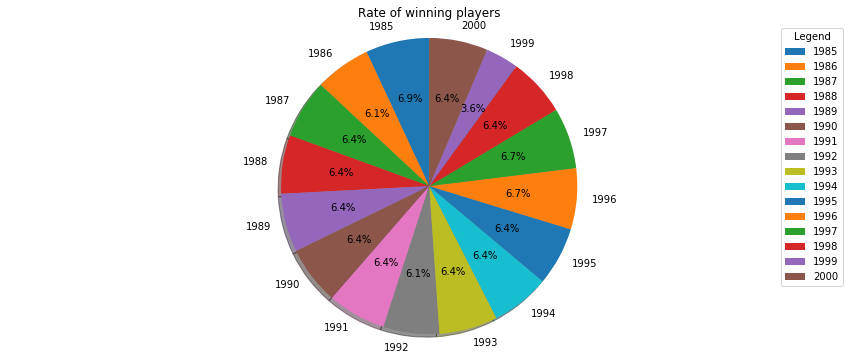

In [25]:
#Rate of players winning the title every year between 1984 and 2000
result = nba_df.groupby(['Season_end'])['Unique_id'].count().reset_index(name='counts')
result
x = result['Season_end']
y = result['counts']                  

plt.rcParams['figure.figsize'] = [15,6]
plt.pie(y, labels=x, autopct='%1.1f%%',shadow=True, startangle=90)
plt.title('Rate of winning players')
plt.legend(title="Legend",loc="upper right")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### 2. Line Graph :-

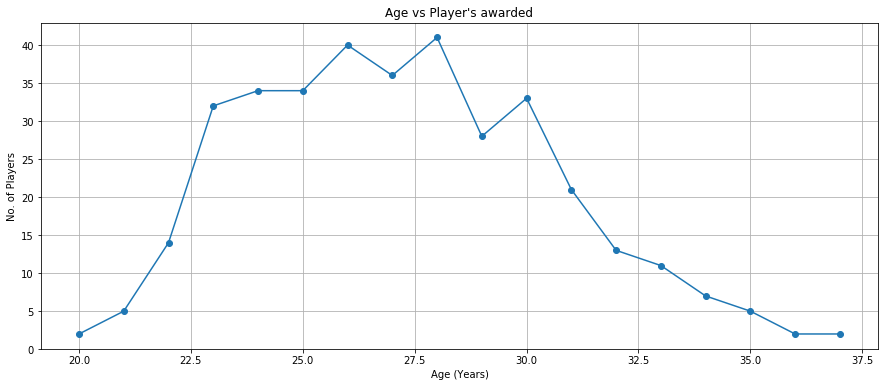

In [26]:
#Line graph representing player's of different age winning the title

result2 = nba_df.groupby(['Age'])['Player'].count().reset_index(name='counts')
x = result2['Age']
y = result2['counts']

plt.rcParams['figure.figsize'] = [15,6]
plt.plot(x,y, marker = 'o')  
plt.grid()
plt.xlabel('Age (Years)')
plt.ylabel('No. of Players')
plt.title("Age vs Player's awarded")
plt.show()


#### 3. Bar Graph :-

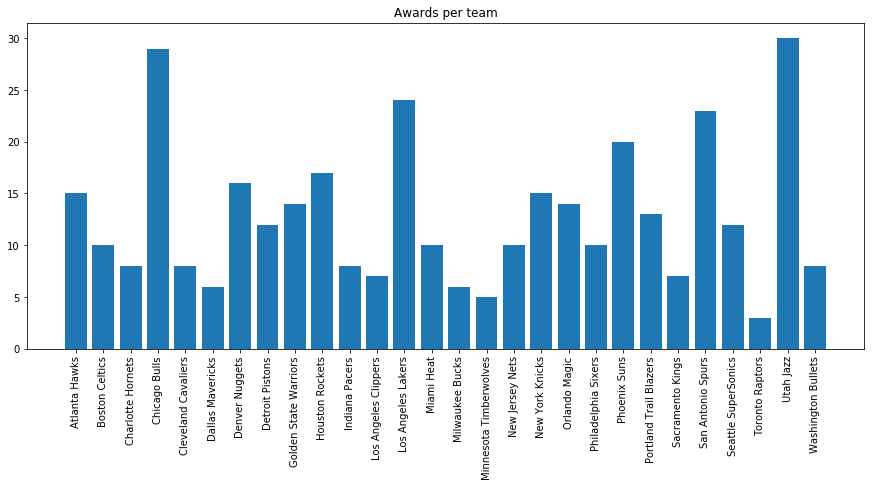

In [27]:
# Players awarded in every teams
result3 = nba_df.groupby(['Team']).size().reset_index(name='count')
x = result3['Team']
y = result3['count']

plt.rcParams['figure.figsize'] = [15,6]
plt.bar(x,y)
plt.xticks(rotation = 90)
plt.title("Awards per team")
plt.show()
